In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f2f_path = "data/out/f2f.csv"
df = pd.read_csv(f2f_path)
df

,id,dyad...4,consent,age,education,gender,1. jag är bra på att beskriva mina känslor,"2. när jag mår bra, kan jag lätt säga om det beror på att jag är stolt över mig själv, glad eller avslappnad.",3. jag har svårt att förstå varför jag reagerar på det sätt jag gör.,4. när jag känner mig nedstämd kan jag enkelt göra en koppling mellan mina känslor och den situation som påverkade mig.,...,la förhandlingen en bra grund för eventuella framtida samarbeten eller en social relation med din motpart?,var det viktigt för dig att vinna spelet?,tycker du att din medspelare var trevlig?,var det viktigt för dig att din motpart skulle vara nöjd med utfallet av förhandlingen?,poäng,resultat,...54,dyad...55,totalpoäng,"bekanta (1=ja, 0=nej)"
0,F9B,9,Ja,33,Masterexamen,Man,6,4,1,7,...,7,4,7,7,1000,Lika,NaN,6.0,1800.0,1.0
1,F5A,5,Ja,34,Gymnasium,Man,6,5,3,3,...,5,3,7,5,675,Vinst,NaN,14.0,1570.0,1.0
2,F7B,7,Ja,24,Gymnasium,Man,5,6,2,5,...,6,5,7,2,700,Förlust,NaN,18.0,1200.0,1.0
3,F14B,14,Ja,21,Gymnasium,Kvinna,6,5,6,6,...,5,7,5,7,880,Vinst,NaN,NaN,NaN,NaN
4,F15A,15,Ja,23,Kandidatexamen,Man,3,6,2,6,...,5,5,6,2,945,Vinst,NaN,NaN,NaN,NaN
5,F2B,2,Ja,36,Masterexamen,Kvinna,7,6,2,6,...,6,2,7,6,945,Förlust,NaN,3.0,2000.0,0.0
6,F8B,8,Ja,22,Gymnasium,Kvinna,5,4,2,3,...,2,5,7,5,625,Förlust,NaN,20.0,1200.0,0.0
7,F7A,7,Ja,55,Kandidatexamen,Man,5,5,2,6,...,4,5,6,5,800,Vinst,NaN,17.0,2000.0,1.0
8,F16B,16,Ja,26,Kandidatexamen,Kvinna,2,6,2,5,...,3,6,5,4,100,Lika,NaN,NaN,NaN,NaN
9,F19B,19,Ja,19,Gymnasium,Kvinna,4,6,3,5,...,6,3,7,4,800,Lika,NaN,NaN,NaN,NaN


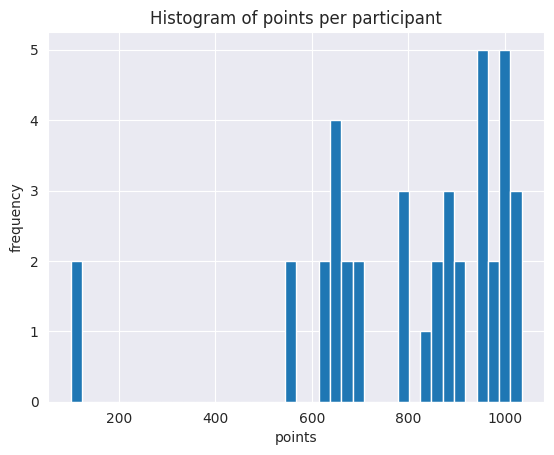

In [3]:
plt.hist(df["poäng"], bins=40)
plt.title("Histogram of points per participant")
plt.xlabel("points")
plt.ylabel("frequency")
plt.show()

(20, 2)


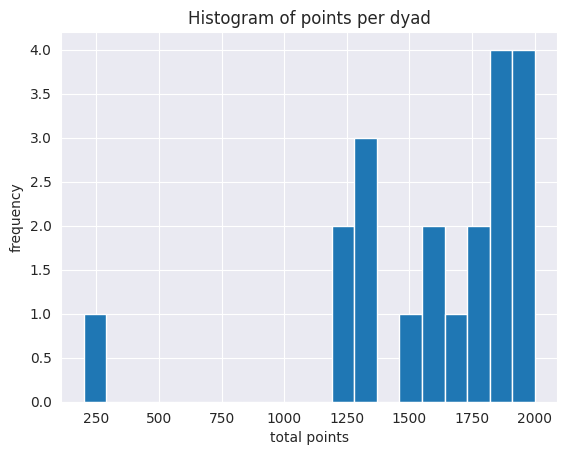

In [4]:
df['dyad_id'] = df['id'].str.extract('(\d+)').astype(int)

# Group by 'dyad ID' and sum the 'points' within each group
dyad_points = df.groupby('dyad_id')['poäng'].sum().reset_index(name='totalpoäng')
print(dyad_points.shape)

# Merge the summed points back into the original dataframe
df_merged = df.merge(dyad_points, on='dyad_id')

plt.hist(dyad_points["totalpoäng"], bins=20)
plt.title("Histogram of points per dyad")
plt.xlabel("total points")
plt.ylabel("frequency")
plt.show()

## Investigating the trait survey

In [5]:
df_trait_survey = df.iloc[:, 6: 26]
df_trait_survey

,1. jag är bra på att beskriva mina känslor,"2. när jag mår bra, kan jag lätt säga om det beror på att jag är stolt över mig själv, glad eller avslappnad.",3. jag har svårt att förstå varför jag reagerar på det sätt jag gör.,4. när jag känner mig nedstämd kan jag enkelt göra en koppling mellan mina känslor och den situation som påverkade mig.,"5. jag tycker att det är svårt att förklara mina känslor för andra, även när jag verkligen vill.",6. när jag blir rörd av något så vet jag direkt vilken känsla som jag känner.,"7. när jag blir arg, så har jag lätt att lugna ner mig.",8. jag har svårt att hantera mina känslor.,9. mina känslor talar om för mig vilka förändringar som jag borde göra i mitt liv.,10. jag undviker att göra mina personliga livsval baserade på mina känslor.,11. jag är bra på att känna av vad andra känner.,12. jag är ganska omedveten om andra människors känslor.,13. jag förstår inte varför människor runt omkring mig reagerar som de gör.,14. jag förstår varför människor känner som de gör.,15. andra människor tenderar att anförtro mig personliga saker,16. jag har svårt att lyssna på människor som klagar.,"17. när jag möter någon som är stressad eller orolig, kan jag lätt lugna ner dem.",18. när jag möter någon som gråter så vet jag inte vad jag ska göra.,19. jag kan lätt få det jag vill ha från andra.,20. om jag vill så kan jag enkelt få en annan människa att känna sig illa till mods.
0,6,4,1,7,2,5,4,3,5,6,5,2,1,6,6,1,6,3,5,6
1,6,5,3,3,2,4,5,4,6,3,5,2,2,5,6,6,5,5,5,6
2,5,6,2,5,3,5,3,3,1,7,5,2,2,5,6,6,6,2,5,6
3,6,5,6,6,2,6,5,3,5,1,5,5,5,4,6,7,2,7,7,6
4,3,6,2,6,4,2,7,4,2,6,6,5,3,6,7,3,5,5,6,5
5,7,6,2,6,2,6,5,6,6,3,5,2,3,5,6,4,7,2,4,5
6,5,4,2,3,6,5,6,4,5,2,7,2,7,7,6,6,7,2,4,2
7,5,5,2,6,2,5,2,5,3,6,5,3,3,4,3,5,5,2,2,6
8,2,6,2,5,6,4,6,2,5,6,4,4,4,5,7,2,5,3,3,2
9,4,6,3,5,5,5,3,6,4,3,5,2,2,6,6,2,5,2,5,4


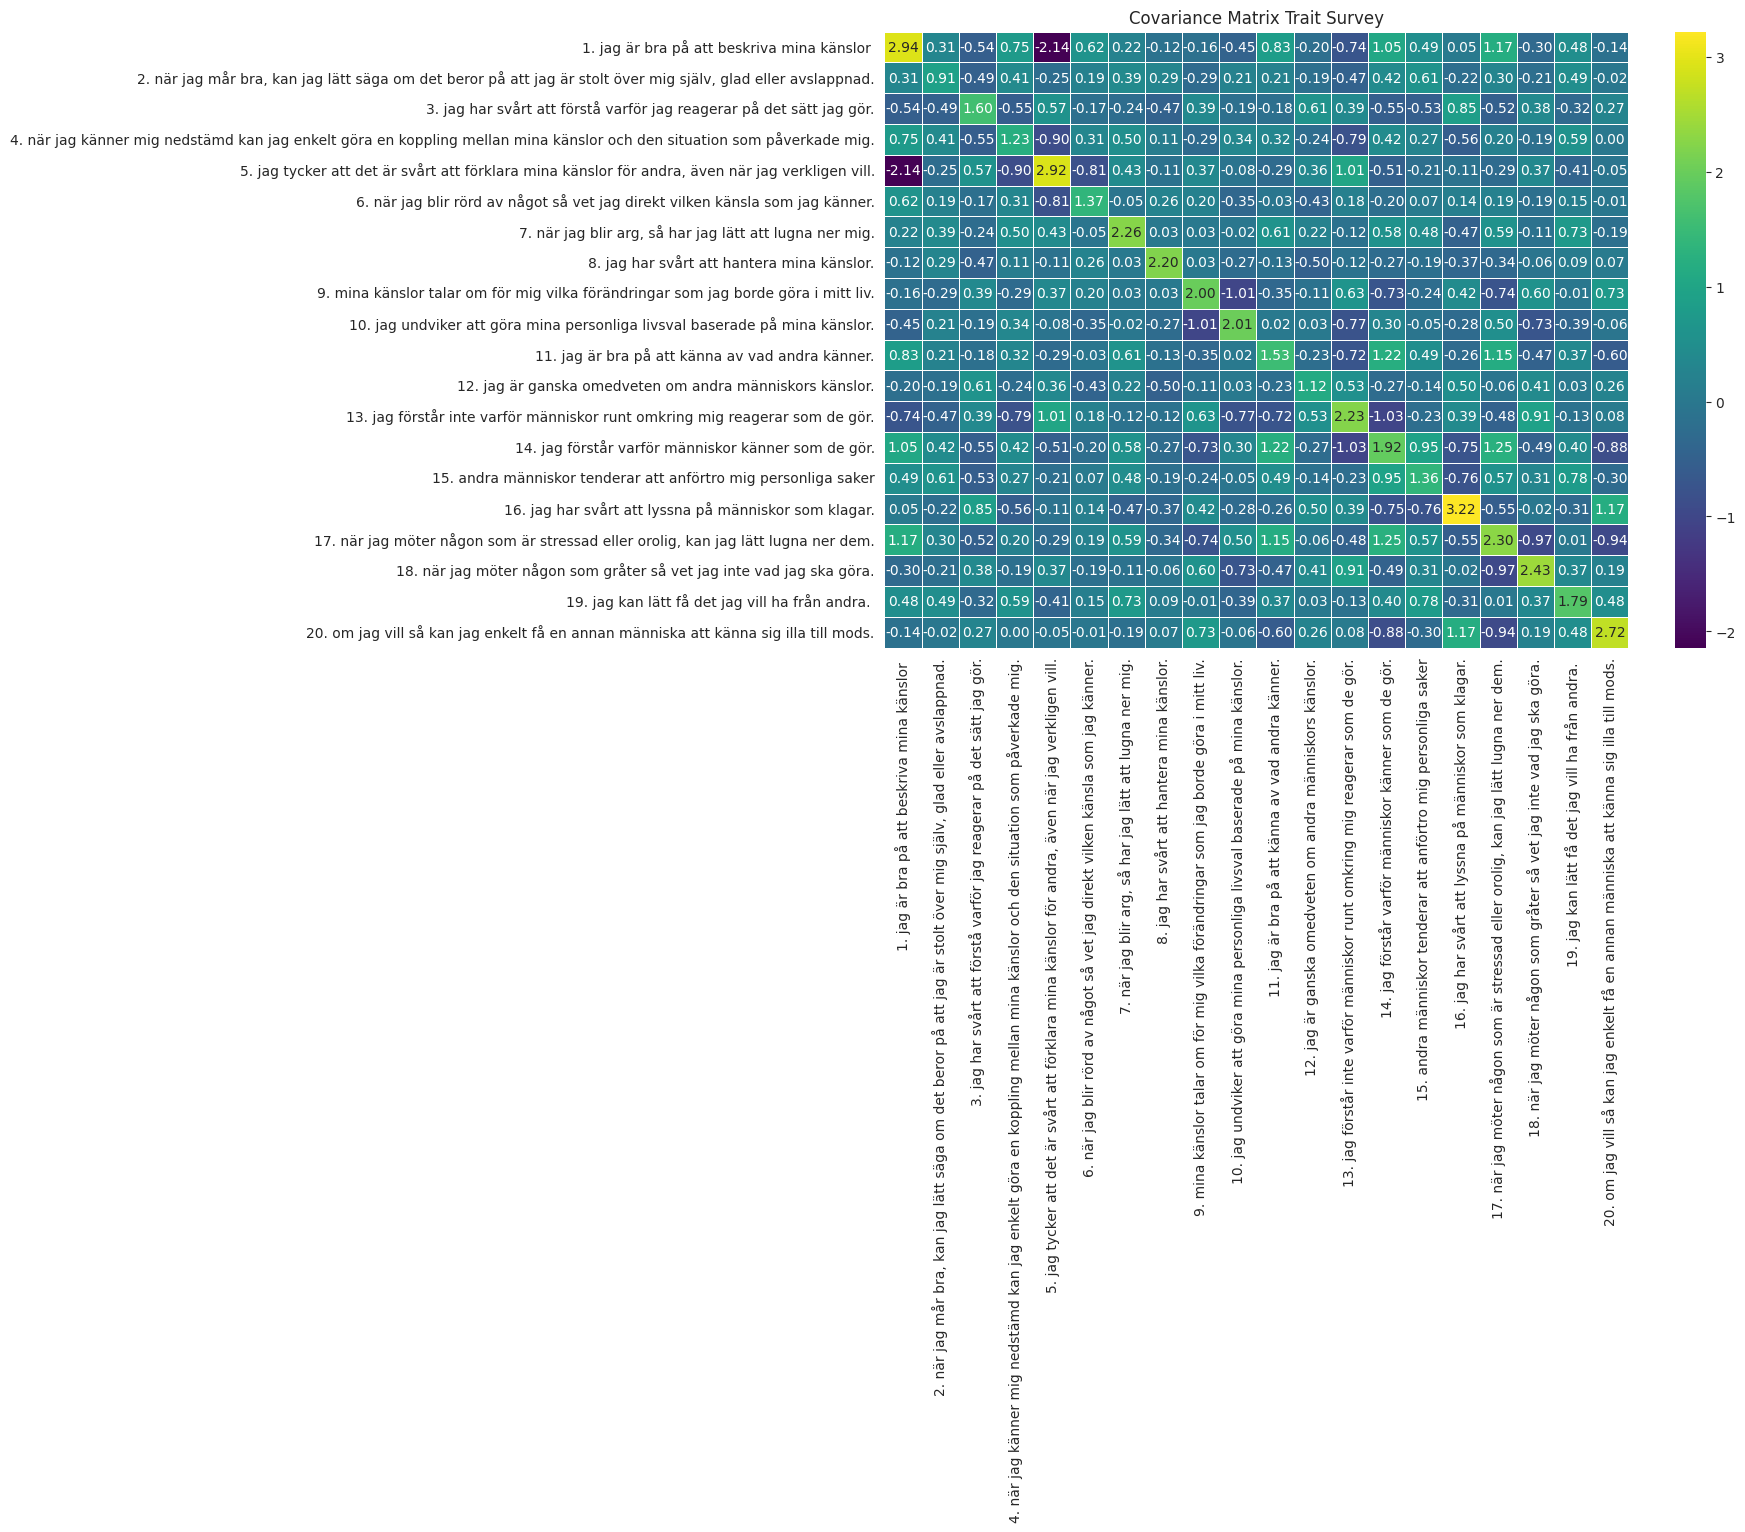

In [6]:
cov_matrix = df_trait_survey.cov()

# Plotting the heatmap
plt.figure(figsize=(12,8))  # Set the figure size (optional)
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True, linewidths=.5)

# Adding titles and labels for clarity
plt.title('Covariance Matrix Trait Survey')
plt.show()

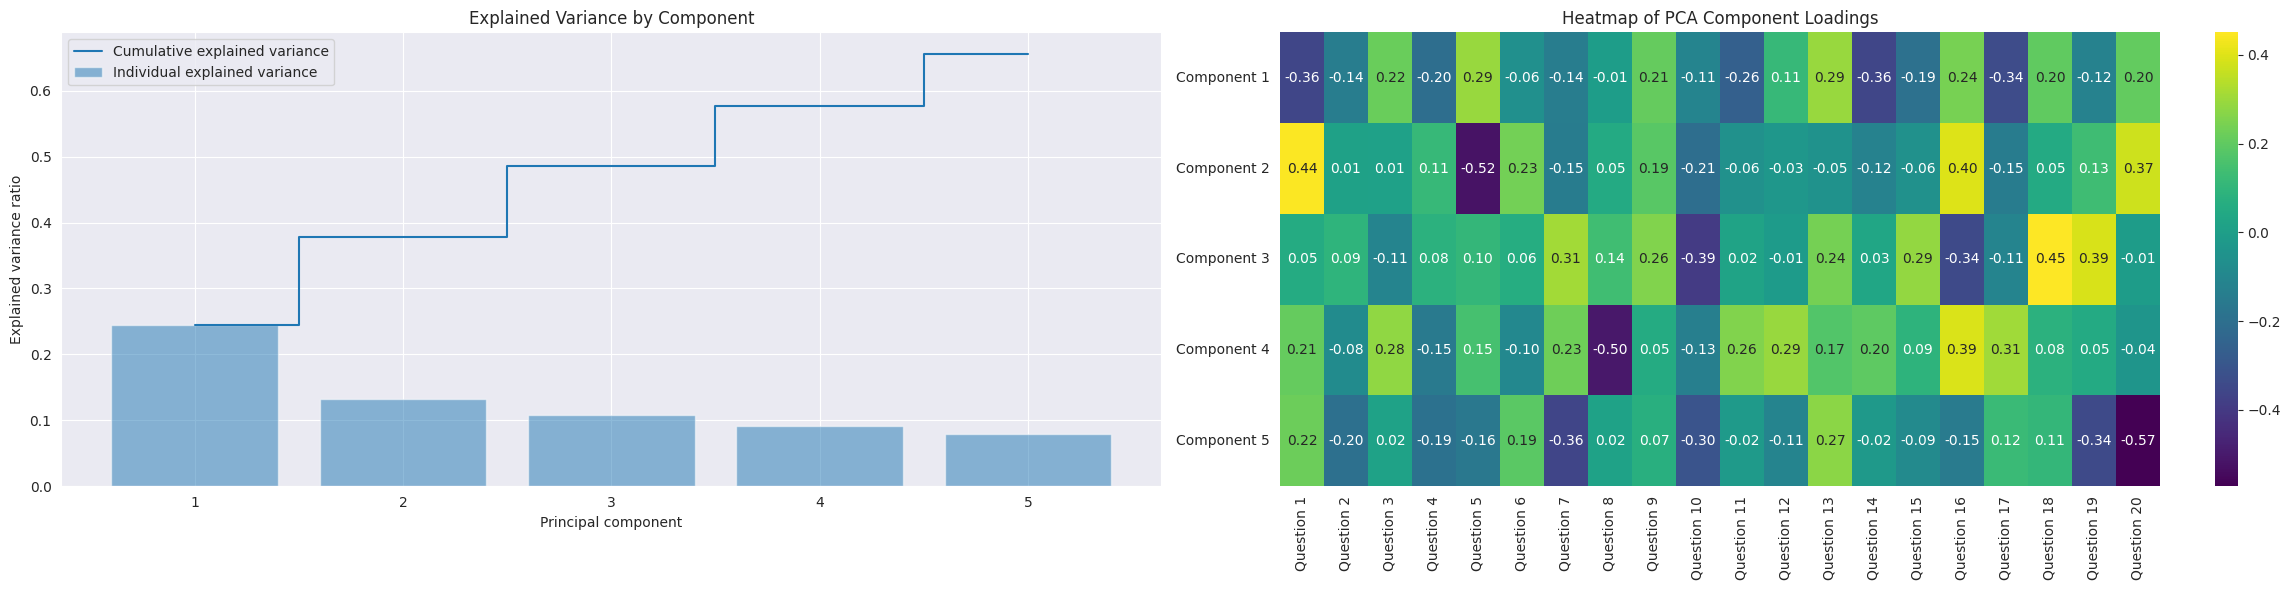

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_components = 5

# Applying PCA
pca = PCA(n_components=n_components)  # Choosing 7 components as an example
pca.fit(df_trait_survey.values)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plotting the explained variance
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, n_components + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, n_components + 1), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.title('Explained Variance by Component')

# Heatmap of the loadings (component vectors)
loadings = pca.components_

plt.subplot(1, 2, 2)
sns.heatmap(loadings, cmap='viridis', annot=True, fmt=".2f",
            xticklabels=[f'Question {i+1}' for i in range(0, 20)],
            yticklabels=[f'Component {i+1}' for i in range(0, n_components)])
plt.title('Heatmap of PCA Component Loadings')

plt.tight_layout()
plt.show()

In [8]:
# Projecting the standardized data onto the first two principal components
pca_scores = pca.transform(df_trait_survey.values)

# Extracting the scores for the first two components
component_1_scores = pca_scores[:, 0]  # First component scores
component_2_scores = pca_scores[:, 1]  # Second component scores

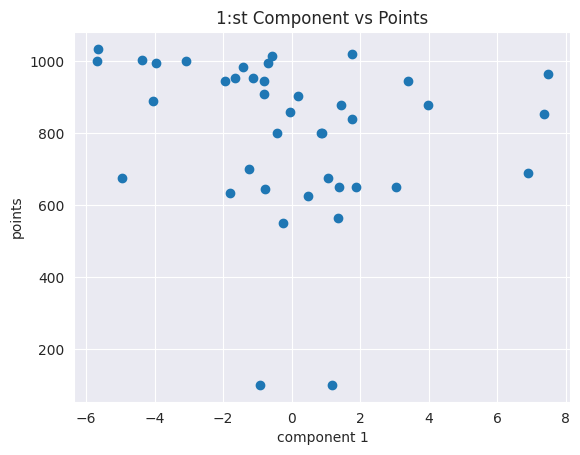

In [9]:
plt.scatter(component_1_scores, df["poäng"])
plt.title("1:st Component vs Points")
plt.xlabel("component 1")
plt.ylabel("points")
plt.show()

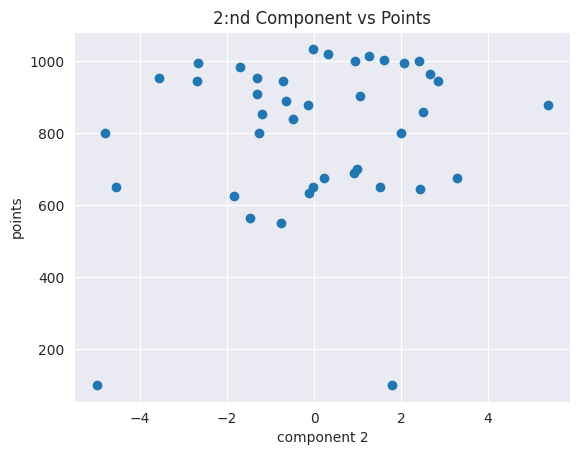

In [10]:
plt.scatter(component_2_scores, df["poäng"])
plt.title("2:nd Component vs Points")
plt.xlabel("component 2")
plt.ylabel("points")
plt.show()

## Investigating the experiment survey

In [11]:
df_experiment_survey = df.iloc[:, 28: 49]
df_experiment_survey

,hur väl kände du din motspelare sen tidigare?,hur nöjd är du med ditt eget resultat i förhandlingarna–d.v.s. i vilken utsträckning gynnades du?,hur nöjd är du med balansen mellan ditt eget resultat och motpartens utfall?,"kände du att du förlorade eller ""vann"" i förhandlingarna?",anser du att villkoren i förhandlingarna var rättvisa?,blev du någon gång illa berörd under förhandlingen?,fick förhandlingarna dig att känna dig mer eller mindre kompetent som förhandlare?,uppförde du dig enligt dina egna principer och värderingar?,påverkade förhandlingen din självbild eller ditt intryck av dig själv positivt eller negativt?,upplever du att din motpart lyssnade på dina önskemål?,...,hur nöjd är du med lättheten (eller svårigheten) att nå en överenskommelse?,"hade du din motparts önskemål, åsikter eller behov i åtanke under förhandlingen?","upplevde du att din motpart hade dina önskemål, åsikter eller behov i åtanke?","vilken typ av ""övergripande"" intryck gjorde din motpart på dig?",hur nöjd är du med relationen till din motpart som ett resultat av denna förhandling?,fick förhandlingen dig att lita på din motpart?,la förhandlingen en bra grund för eventuella framtida samarbeten eller en social relation med din motpart?,var det viktigt för dig att vinna spelet?,tycker du att din medspelare var trevlig?,var det viktigt för dig att din motpart skulle vara nöjd med utfallet av förhandlingen?
0,1,7,7,4,7,1,7,7,7,7,...,7.0,7,7,7,7,7,7,4,7,7
1,4,3,6,3,6,1,3,6,4,6,...,5.0,6,6,6,5,4,5,3,7,5
2,1,5,5,6,7,2,5,6,4,7,...,6.0,2,2,6,6,6,6,5,7,2
3,5,7,6,7,4,5,7,5,4,5,...,7.0,7,7,4,6,5,5,7,5,7
4,7,6,6,7,6,5,7,6,3,6,...,5.0,4,6,5,5,5,5,5,6,2
5,1,5,6,3,7,3,3,7,5,2,...,6.0,6,5,6,6,3,6,2,7,6
6,1,2,3,2,4,1,2,3,3,2,...,5.0,6,3,4,3,3,2,5,7,5
7,1,6,5,5,6,1,2,5,2,5,...,5.0,5,3,6,6,4,4,5,6,5
8,6,4,3,6,6,1,3,3,4,2,...,5.0,3,2,3,4,2,3,6,5,4
9,3,3,4,3,6,1,3,4,4,6,...,6.0,5,5,6,7,6,6,3,7,4


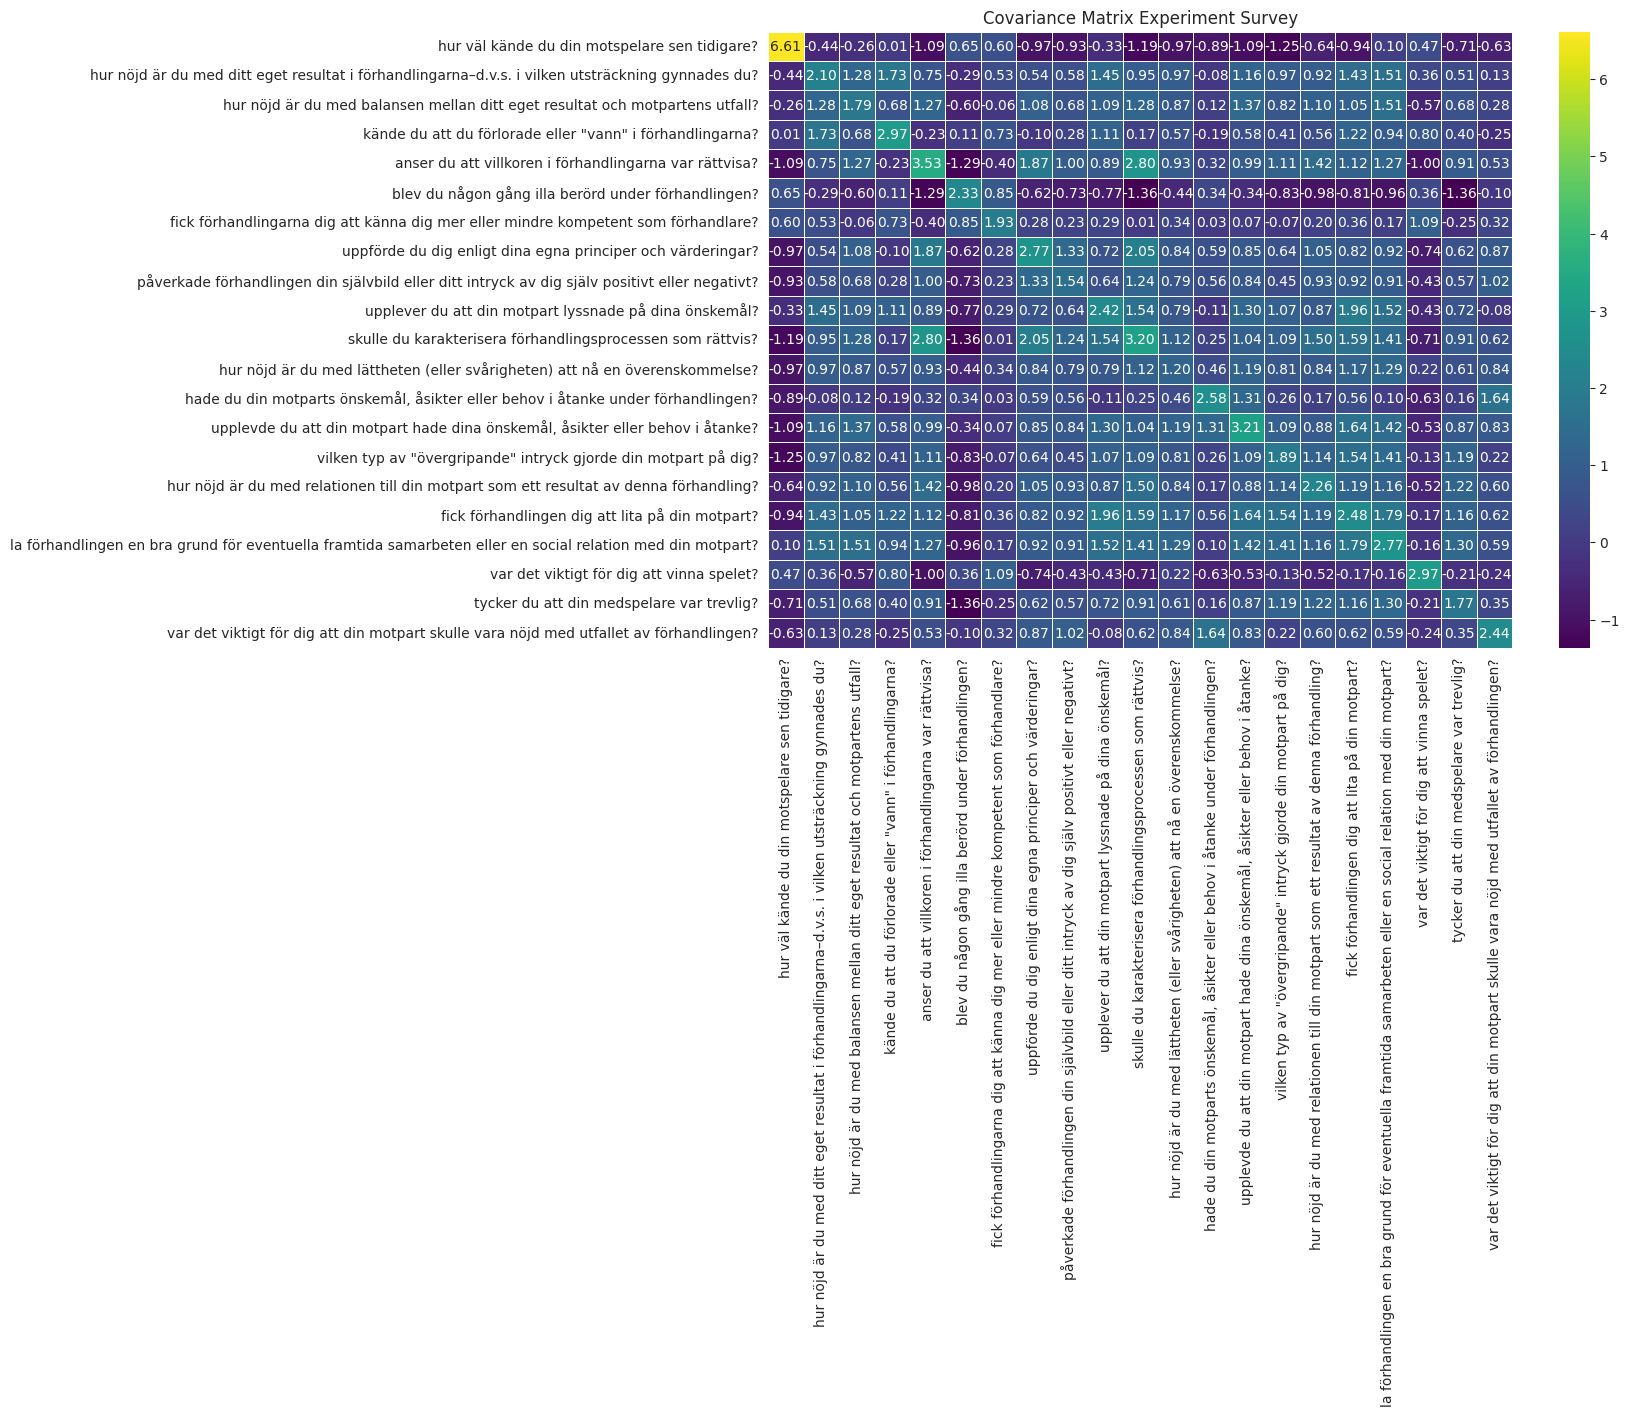

In [12]:
cov_matrix = df_experiment_survey.cov()

# Plotting the heatmap
plt.figure(figsize=(12,8))  # Set the figure size (optional)
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="viridis", cbar=True, linewidths=.5)

# Adding titles and labels for clarity
plt.title('Covariance Matrix Experiment Survey')
plt.show()

In [13]:
df_experiment_survey.isnull().values.any()

True

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df_experiment_survey_imputed = imputer.fit_transform(df_experiment_survey)
df_experiment_survey_imputed

array([[1., 7., 7., 4., 7., 1., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
        7., 7., 4., 7., 7.],
       [4., 3., 6., 3., 6., 1., 3., 6., 4., 6., 6., 5., 6., 6., 6., 5.,
        4., 5., 3., 7., 5.],
       [1., 5., 5., 6., 7., 2., 5., 6., 4., 7., 7., 6., 2., 2., 6., 6.,
        6., 6., 5., 7., 2.],
       [5., 7., 6., 7., 4., 5., 7., 5., 4., 5., 5., 7., 7., 7., 4., 6.,
        5., 5., 7., 5., 7.],
       [7., 6., 6., 7., 6., 5., 7., 6., 3., 6., 5., 5., 4., 6., 5., 5.,
        5., 5., 5., 6., 2.],
       [1., 5., 6., 3., 7., 3., 3., 7., 5., 2., 3., 6., 6., 5., 6., 6.,
        3., 6., 2., 7., 6.],
       [1., 2., 3., 2., 4., 1., 2., 3., 3., 2., 3., 5., 6., 3., 4., 3.,
        3., 2., 5., 7., 5.],
       [1., 6., 5., 5., 6., 1., 2., 5., 2., 5., 6., 5., 5., 3., 6., 6.,
        4., 4., 5., 6., 5.],
       [6., 4., 3., 6., 6., 1., 3., 3., 4., 2., 4., 5., 3., 2., 3., 4.,
        2., 3., 6., 5., 4.],
       [3., 3., 4., 3., 6., 1., 3., 4., 4., 6., 6., 6., 5., 5., 6., 7.,
        6., 6., 3.,

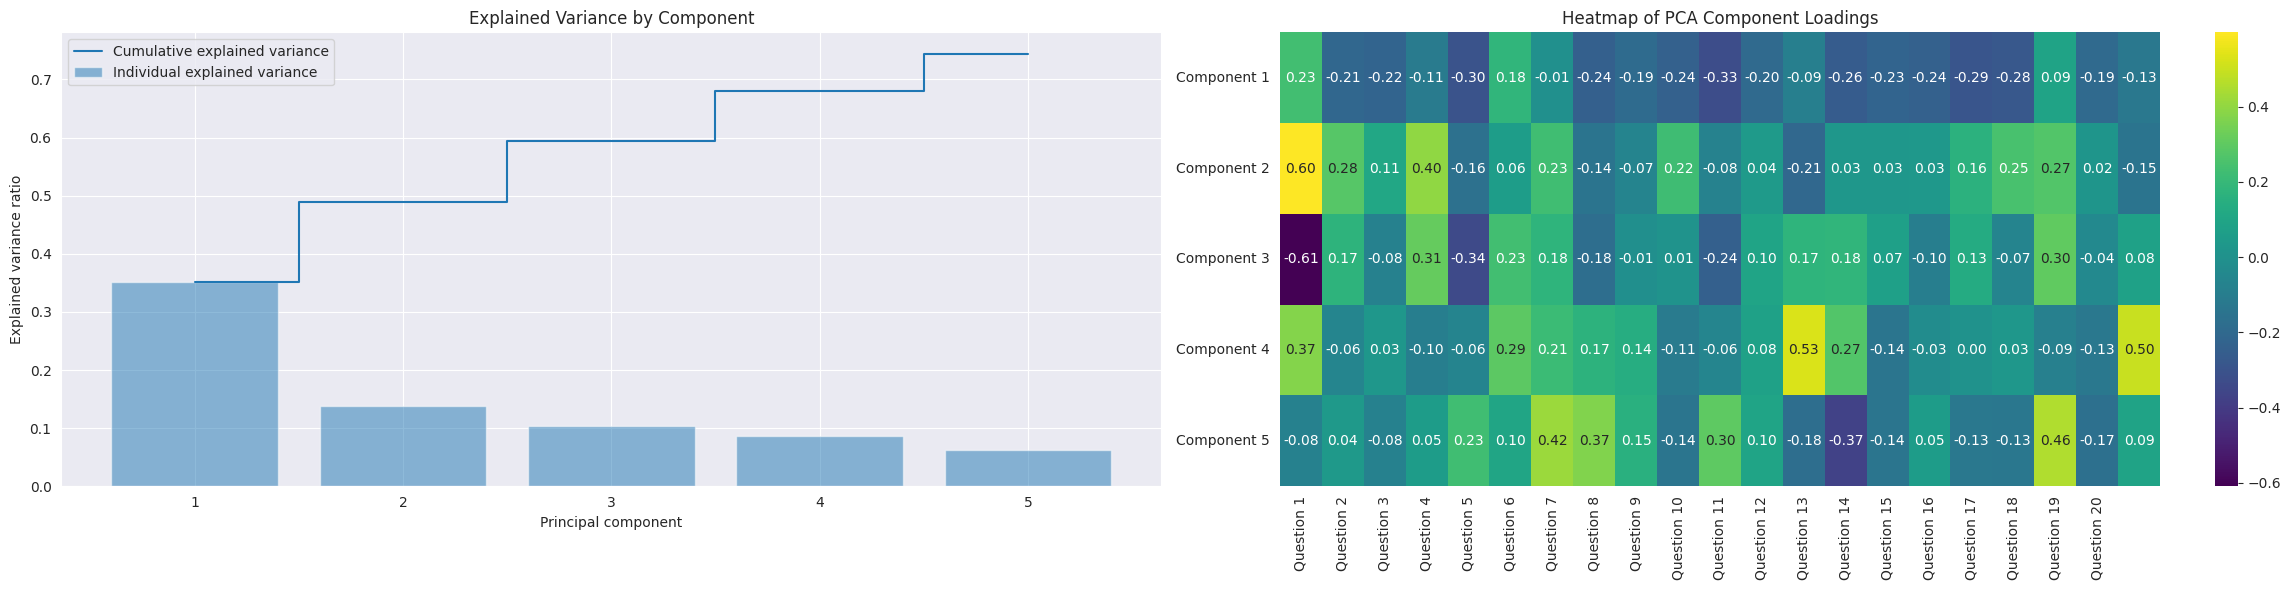

In [15]:
n_components = 5

# Applying PCA
pca = PCA(n_components=n_components)  # Choosing 7 components as an example
pca.fit(df_experiment_survey_imputed)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plotting the explained variance
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, n_components + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, n_components + 1), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.title('Explained Variance by Component')

# Heatmap of the loadings (component vectors)
loadings = pca.components_

plt.subplot(1, 2, 2)
sns.heatmap(loadings, cmap='viridis', annot=True, fmt=".2f",
            xticklabels=[f'Question {i+1}' for i in range(0, 20)],
            yticklabels=[f'Component {i+1}' for i in range(0, n_components)])
plt.title('Heatmap of PCA Component Loadings')

plt.tight_layout()
plt.show()

In [16]:
# Projecting the standardized data onto the first two principal components
pca_scores = pca.transform(df_experiment_survey_imputed)

# Extracting the scores for the first two components
component_1_scores = pca_scores[:, 0]  # First component scores
component_2_scores = pca_scores[:, 1]  # Second component scores

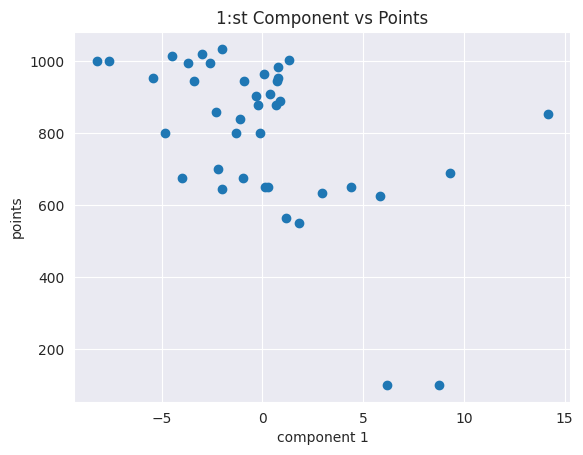

In [17]:
plt.scatter(component_1_scores, df["poäng"])
plt.title("1:st Component vs Points")
plt.xlabel("component 1")
plt.ylabel("points")
plt.show()

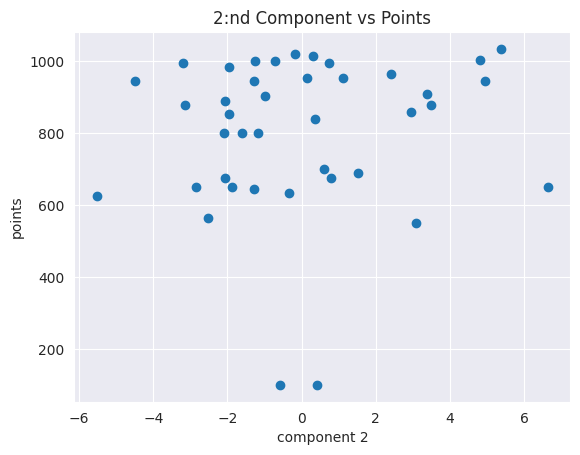

In [18]:
plt.scatter(component_2_scores, df["poäng"])
plt.title("2:nd Component vs Points")
plt.xlabel("component 2")
plt.ylabel("points")
plt.show()